In [24]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/User/Documents/AAA NUS Y4S2/DSA4263/PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Label Encoding 

In [4]:
df['type'] = df['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4})

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)

In [21]:
df.shape

(6362620, 7)

## Testing: linear regression on transaction amount

In [22]:
# Separate features and target
testX = df.drop(['amount'], axis=1)  # Features (all columns except amount)
testy = df['amount']  # Target variable we want to predict

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(testX, testy, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

# Interpretation:
# R² of 1 means perfect prediction, 0 means no better than average
# Negative R² means worse than just predicting the mean

Mean Squared Error (MSE): 90867961775.79
Root Mean Squared Error (RMSE): 301443.13
R-squared (R²) Score: 0.76


## Split data for testing

In [8]:
# X Data
X = df.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = df['isFraud']
print('y shape is : ' , y.shape)

X shape is :  (6362620, 6)

y shape is :  (6362620,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (5090096, 6)
X_test shape is  (1272524, 6)
y_train shape is  (5090096,)
y_test shape is  (1272524,)


## Linear Regression

In [13]:
# Initialize Linear Regression
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(X_train, y_train)

LinearRegression()

Linear Regression Mean Squared Error: 0.0010791850817662057


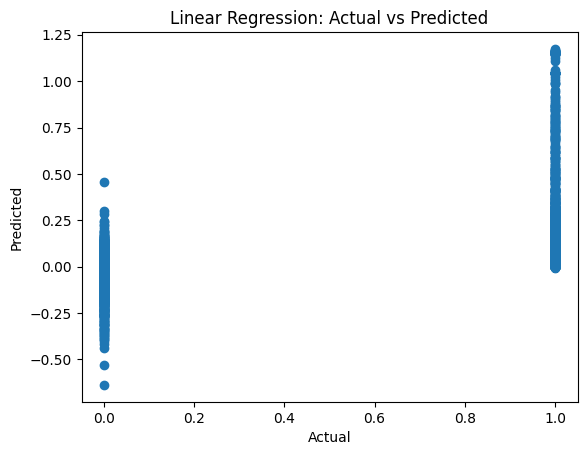

In [14]:
# Predict on the test set
y_pred_linreg = linreg.predict(X_test)

# Evaluate using Mean Squared Error (MSE) - although not ideal for classification
mse = mean_squared_error(y_test, y_pred_linreg)
print("Linear Regression Mean Squared Error:", mse)

# Optionally, you can plot the Actual vs Predicted values for visual understanding
plt.scatter(y_test, y_pred_linreg)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [ ]:
# Convert continuous predictions to binary (fraud = 1, not fraud = 0)
y_pred_binary = np.where(y_pred_linreg >= 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))


Accuracy: 0.9988377429423728
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      0.09      0.16      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.54      0.58   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
 [[1270904       0]
 [   1479     141]]


## Logistic Regression

In [32]:
# StandardScaler for Data

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)
y_pred_LR = Model_LR.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.92 %
Testing accuracy: 99.92 %


In [37]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)

print(cm)


[[1270799     105]
 [    942     678]]


In [35]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.87      0.42      0.56      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.71      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



In [38]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.92 %

➤➤➤ Precision Score :  86.59 %

➤➤➤ Recall Score :  41.85 %

➤➤➤ F1 Score :  56.43 %

➤➤➤ AUC_ROC :  70.92 %

